## Final Project Submission

Please fill out:
* Student name: Jean Guetcheen CHARLES 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Wedter Jerome
* Blog post URL:


## I- Préparation de l’environnement de travail et chargement des données.
### Dans cette cellule, j’ai importé les bibliothèques utiles, configuré l’environnement pour l’analyse de données, et chargé un fichier CSV contenant les revenus de films au box office pour débuter l’exploration.

In [1]:
# Your code here - remimport pandas as pd
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Options pour mieux afficher les données
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Chargement des revenus box office
box_office = pd.read_csv("bom.movie_gross.csv")

# Vérification des colonnes
print(box_office.columns)
box_office.head()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## II- Chargement et nettoyage des données du box office.
### Dans cette étape, j’ai chargé les données du box office, identifié les valeurs manquantes et remplacé celles-ci par 0 pour faciliter les analyses ultérieures.

In [2]:
# Chargement du fichier CSV
df = pd.read_csv("bom.movie_gross.csv")

#  Nombre total de lignes et de colonnes avant nettoyage
print("\n Dimensions du fichier :")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

nb_lignes_a_erreur = df[df.isnull().any(axis=1)].shape[0]
print(f"\n Nombre de lignes avec au moins une valeur manquante : {nb_lignes_a_erreur}")

# On remplace les valeurs manquantes par 0
df.fillna(0, inplace=True)


 Dimensions du fichier :
Nombre de lignes : 3387
Nombre de colonnes : 5

 Nombre de lignes avec au moins une valeur manquante : 1380


## III- Inspection des colonnes et des informations du dataset.
### Cette étape permet d'examiner la structure du jeu de données, les noms des colonnes, les types de données, et de repérer d’éventuelles incohérences ou colonnes inutiles.

In [3]:
# Vérification des colonnes
print(df.columns)
df.head()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
print("\n Informations sur les colonnes :")
print(df.info())


 Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


## IV- Suppression des lignes et colonnes avec trop de valeurs manquantes
### Dans cette étape, j’ai nettoyé le jeu de données en supprimant les lignes et colonnes qui contiennent plus de 50 % de valeurs manquantes afin d’améliorer la qualité de l’analyse.

In [5]:
# Suppression des lignes ayant plus de 50% de NaN
seuil = 0.5  # seuil de 50%
df_clean = df[df.isnull().mean(axis=1) < seuil]
print(f"Nombre de lignes restantes : {df_clean.shape[0]}")
# Suppression des colonnes ayant plus de 50% de NaN
df_clean = df.loc[:, df.isnull().mean(axis=0) < seuil]
print(f"Nombre de colonnes : {df_clean.shape[1]}")

Nombre de lignes restantes : 3387
Nombre de colonnes : 5


## V- Connexion à la base de données SQLite et chargement des tables.
### Dans cette cellule, je me connecte à la base de données SQLite et j’importe les principales tables nécessaires pour effectuer les analyses croisées avec les données du box office.

In [6]:
# Connexion à la base de données
conn = sqlite3.connect("im.db")

# Chargement des tables
movies = pd.read_sql_query("SELECT * FROM movie_basics", conn)
ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
persons = pd.read_sql_query("SELECT * FROM persons", conn)
principals = pd.read_sql_query("SELECT * FROM principals", conn)
writers = pd.read_sql_query("SELECT * FROM writers", conn)
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas", conn)
known_for = pd.read_sql_query("SELECT * FROM known_for", conn)
directors = pd.read_sql_query("SELECT * FROM directors", conn)

# Liste des tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables disponibles :")
print(tables)

Tables disponibles :
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


## VI- Analyse des valeurs manquantes dans les tables importées
### Cette étape me permet d’évaluer le pourcentage de valeurs manquantes dans chaque colonne des différentes tables, afin de déterminer si un nettoyage est nécessaire avant l’analyse.

In [7]:
print(f" Valeurs manquantes dans les colonnes de la table movies:\n {(movies.isnull().mean() * 100).round(2)}")
print(f" Valeurs manquantes dans les colonnes de la table movies ratings:\n {(ratings.isnull().mean() * 100).round(2)}")
print(f" Valeurs manquantes dans les colonnes de la table persons:\n {(persons.isnull().mean() * 100).round(2)}")
print(f" Valeurs manquantes dans les colonnes de la table principals:\n {(principals.isnull().mean() * 100).round(2)}")
print(f" Valeurs manquantes dans les colonnes de la table writers:\n {(writers.isnull().mean() * 100).round(2)}")
print(f" Valeurs manquantes dans les colonnes de la table movie akas:\n {(movie_akas.isnull().mean() * 100).round(2)}")
print(f" Valeurs manquantes dans les colonnes de la table known for:\n {(known_for.isnull().mean() * 100).round(2)}")
print(f" Valeurs manquantes dans les colonnes de la table directors:\n {(directors.isnull().mean() * 100).round(2)}")

 Valeurs manquantes dans les colonnes de la table movies:
 movie_id            0.00
primary_title       0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64
 Valeurs manquantes dans les colonnes de la table movies ratings:
 movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64
 Valeurs manquantes dans les colonnes de la table persons:
 person_id              0.00
primary_name           0.00
birth_year            86.36
death_year            98.88
primary_profession     8.46
dtype: float64
 Valeurs manquantes dans les colonnes de la table principals:
 movie_id       0.00
ordering       0.00
person_id      0.00
category       0.00
job           82.72
characters    61.74
dtype: float64
 Valeurs manquantes dans les colonnes de la table writers:
 movie_id     0.0
person_id    0.0
dtype: float64
 Valeurs manquantes dans les colonnes de la table movie akas:
 movie_id              0.00
ordering           

## VII- Préparation des titres et jointure entre les données locales et la base de données
### Dans cette cellule, j’ai nettoyé les titres pour permettre une jointure efficace entre les films du fichier CSV et ceux de la base de données, puis vérifié combien de films sont présents dans la table movie_basics.

In [8]:
# Nettoyer les titres pour faciliter la jointure
movies['primary_title'] = movies['primary_title'].str.strip().str.lower()
box_office['title'] = box_office['title'].str.strip().str.lower()

# Jointure sur le titre
merged_df = pd.merge(movies, box_office, left_on='primary_title', right_on='title', how='inner')

In [9]:
# Nombre de films dans la table 'movies'
query = "SELECT COUNT(*) FROM movie_basics;"
cursor = conn.cursor()
cursor.execute(query)
nb_films_db = cursor.fetchone()[0]
print(f"Nombre de films dans la base de données : {nb_films_db}")

Nombre de films dans la base de données : 146144


## VIII- Analyse des revenus moyens par genre de film. 
### Cette cellule extrait chaque genre de film, calcule les revenus moyens par genre (domestique, étranger et total), puis affiche les résultats sous forme de tableau et de graphique pour mieux comparer leur performance au box office.

,domestic_gross,foreign_gross,total_gross
genre,,,
Sci-Fi,"106,929,563","207,885,904","330,335,596"
Adventure,"94,740,741","208,294,057","318,825,056"
Animation,"87,957,355","196,587,541","305,271,854"
Action,"58,047,648","141,988,157","220,040,026"
Fantasy,"55,279,746","138,822,567","210,406,361"
Family,"46,172,549","92,655,217","155,694,966"
Musical,"28,992,437","74,118,530","128,573,430"
Sport,"36,597,136","66,245,786","123,521,466"
Comedy,"33,596,192","71,548,857","121,945,873"


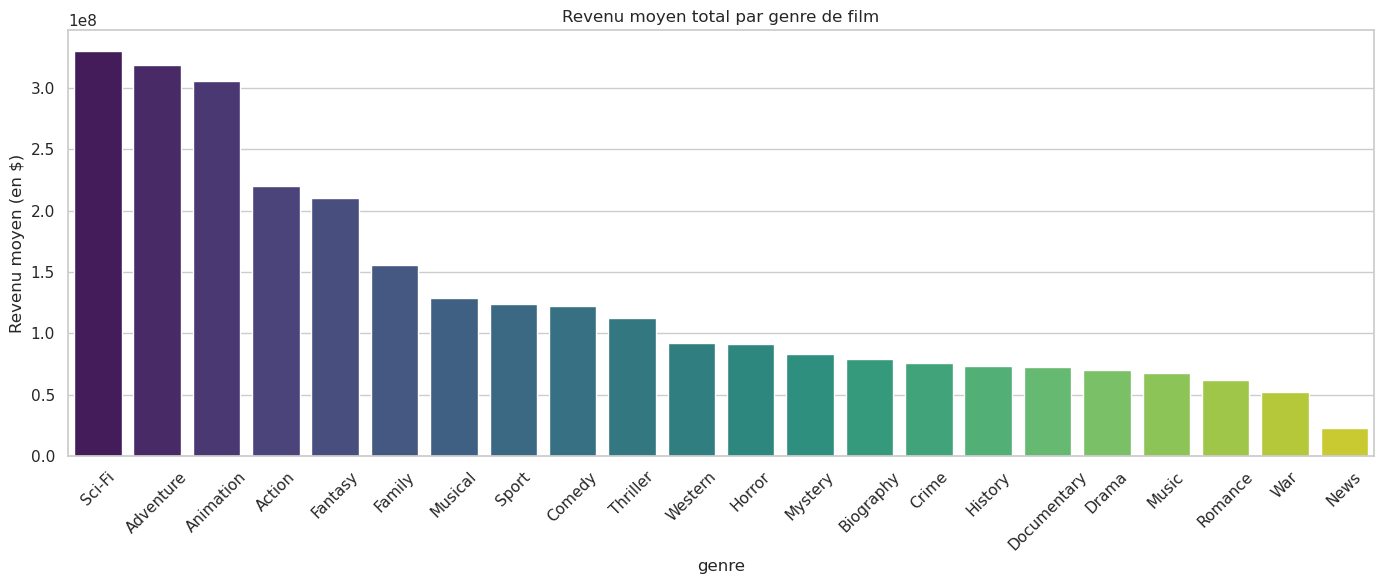

In [10]:
# Séparation des genres multiples
merged_df = merged_df.dropna(subset=["genres"])
exploded_df = merged_df.assign(genre=merged_df["genres"].str.split(',')).explode("genre")
exploded_df["genre"] = exploded_df["genre"].str.strip()

exploded_df["domestic_gross"] = pd.to_numeric(exploded_df["domestic_gross"], errors="coerce")
exploded_df["foreign_gross"] = pd.to_numeric(exploded_df["foreign_gross"], errors="coerce")

# Créer la colonne total_gross
exploded_df["total_gross"] = exploded_df["domestic_gross"] + exploded_df["foreign_gross"]

# Revenus moyens par genre
genre_gross = exploded_df.groupby("genre")[["domestic_gross", "foreign_gross", "total_gross"]].mean().sort_values(by="total_gross", ascending=False)

# Aperçu des revenus moyens par genre
pd.options.display.float_format = '{:,.0f}'.format
display(genre_gross.head(10))

#  Affichage
plt.figure(figsize=(14, 6))
sns.barplot(data=genre_gross.reset_index(), x="genre", y="total_gross", palette="viridis")
plt.title("Revenu moyen total par genre de film")
plt.ylabel("Revenu moyen (en $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## IX- Analyse des revenus moyens par studio de production
### Dans cette cellule, j’ai calculé les revenus moyens (domestiques, étrangers et totaux) par studio, puis visualisé les 10 studios les plus rentables sous forme de graphique et de tableau.

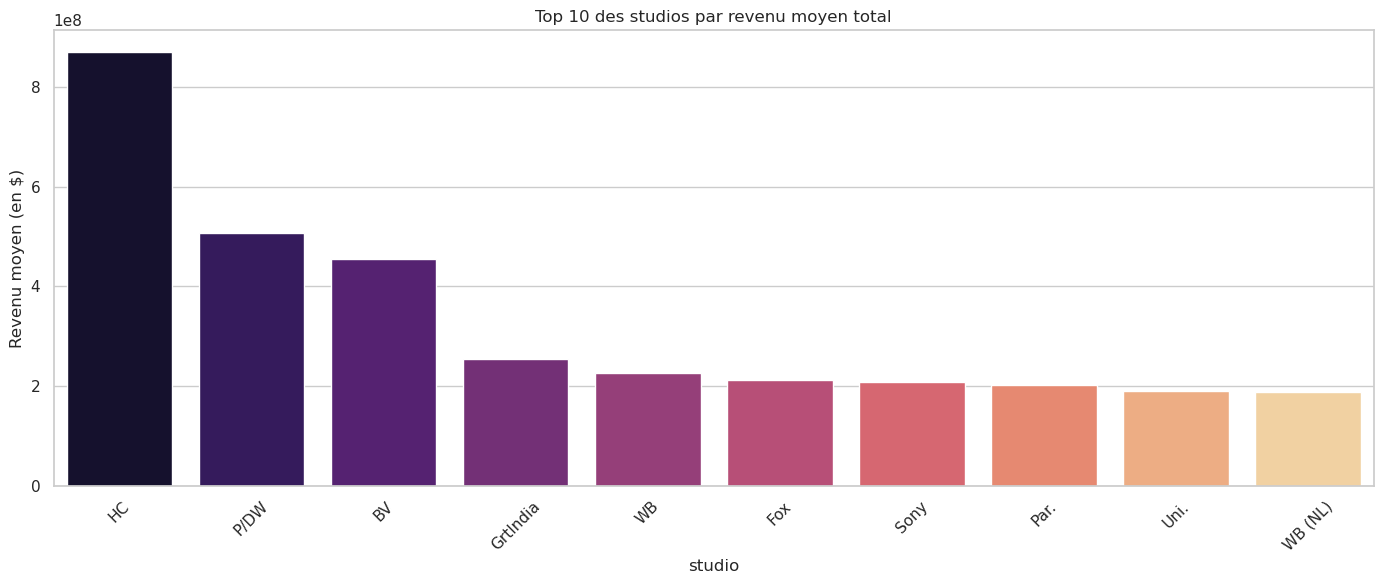

,studio,domestic_gross,foreign_gross,total_gross
0,HC,"2,700,000","867,600,000","870,300,000"
1,P/DW,"168,290,000","339,360,000","507,650,000"
2,BV,"179,550,485","275,883,313","455,479,273"
3,GrtIndia,"20,200,000","234,000,000","254,200,000"
4,WB,"88,877,612","132,413,409","225,760,654"
5,Fox,"76,088,312","134,124,944","211,524,282"
6,Sony,"76,638,485","126,591,011","208,707,382"
7,Par.,"79,718,757","119,732,250","201,941,156"
8,Uni.,"85,868,121","109,523,978","190,404,180"
9,WB (NL),"77,921,212","109,143,077","187,946,154"


In [11]:
# Conversion en float
merged_df["domestic_gross"] = pd.to_numeric(merged_df["domestic_gross"], errors="coerce")
merged_df["foreign_gross"] = pd.to_numeric(merged_df["foreign_gross"], errors="coerce")
# Création de la colonne total_gross 
merged_df["total_gross"] = merged_df["domestic_gross"] + merged_df["foreign_gross"]

# Calcul du revenu moyen total par studio
studio_perf = merged_df.groupby("studio")[["domestic_gross", "foreign_gross", "total_gross"]].mean().sort_values(by="total_gross", ascending=False)

# Affichage graphique
plt.figure(figsize=(14, 6))
top_studios = studio_perf.head(10).reset_index()
sns.barplot(data=top_studios, x="studio", y="total_gross", palette="magma")
plt.title("Top 10 des studios par revenu moyen total")
plt.ylabel("Revenu moyen (en $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Aperçu tabulaire
display(top_studios)


## X- Analyse comparative : Films monogenres vs multigenres 
### Cette cellule compare les performances financières des films selon qu’ils appartiennent à un seul genre (monogenre) ou à plusieurs (multigenre), en mettant en évidence les revenus moyens par catégorie.

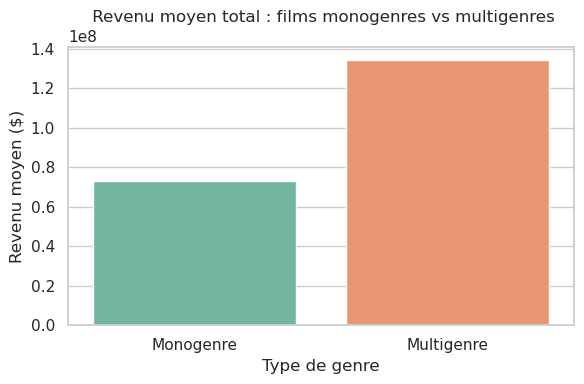

,domestic_gross,foreign_gross,total_gross
type_genre,,,
Monogenre,"16,762,220","40,039,978","72,880,262"
Multigenre,"33,758,847","82,521,982","134,321,071"


In [12]:
# Ajout d'une colonne pour compter le nombre de genres
merged_df["nb_genres"] = merged_df["genres"].str.count(",") + 1

# Création d'une étiquette : monogenre vs multigenre
merged_df["type_genre"] = merged_df["nb_genres"].apply(lambda x: "Multigenre" if x > 1 else "Monogenre")

# Calcul des performances moyennes
perf_by_genre_type = merged_df.groupby("type_genre")[["domestic_gross", "foreign_gross", "total_gross"]].mean()

# Visualisation du revenu total moyen
plt.figure(figsize=(6, 4))
sns.barplot(x=perf_by_genre_type.index, y=perf_by_genre_type["total_gross"], palette="Set2")
plt.title(" Revenu moyen total : films monogenres vs multigenres")
plt.ylabel("Revenu moyen ($)")
plt.xlabel("Type de genre")
plt.tight_layout()
plt.show()

# Affichage tableau
display(perf_by_genre_type)


## XI- Évolution du revenu moyen des films par année de sortie
### Cette cellule fusionne les données de revenus avec les années de sortie des films, puis trace l’évolution du revenu moyen total au box office par année, afin de repérer des tendances dans le temps.

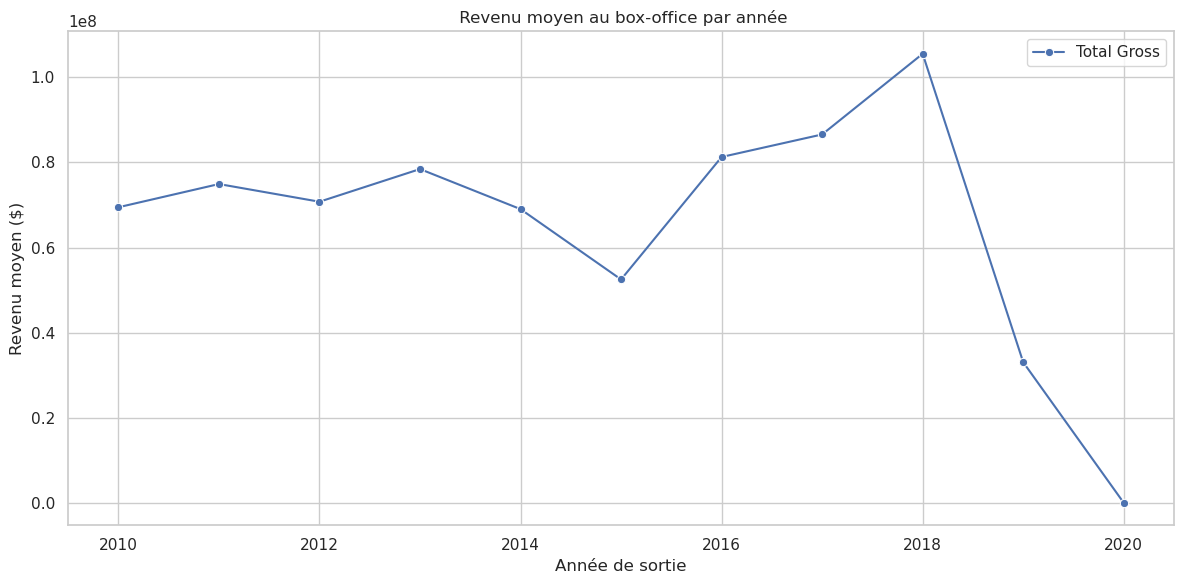

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415,000,000   
1                   Alice in Wonderland (2010)     BV     334,200,000   
2  Harry Potter and the Deathly Hallows Part 1     WB     296,000,000   
3                                    Inception     WB     292,600,000   
4                          Shrek Forever After   P/DW     238,700,000   

   foreign_gross  year   movie_id        primary_title  start_year  \
0    652,000,000  2010  tt0435761          Toy Story 3       2,010   
1    691,300,000  2010        NaN                  NaN         NaN   
2    664,300,000  2010        NaN                  NaN         NaN   
3    535,700,000  2010  tt1375666            Inception       2,010   
4    513,900,000  2010  tt0892791  Shrek Forever After       2,010   

    total_gross  
0 1,067,000,000  
1 1,025,500,000  
2   960,300,000  
3   828,300,000  
4   752,600,000  


In [13]:
# Lecture des colonnes pertinentes depuis la table des films
query = "SELECT movie_id, primary_title, start_year FROM movie_basics"
df_movies = pd.read_sql_query(query, conn)

# Conversion des années
df_movies["start_year"] = pd.to_numeric(df_movies["start_year"], errors="coerce")

# Fusion avec le CSV nettoyé déjà chargé sous le nom df_csv_clean
# On suppose ici que df_csv_clean est déjà propre (lignes et colonnes nettoyées)
merged_df = pd.merge(df_clean, df_movies, left_on="title", right_on="primary_title", how="left")
merged_df["domestic_gross"] = pd.to_numeric(merged_df["domestic_gross"], errors="coerce")
merged_df["foreign_gross"] = pd.to_numeric(merged_df["foreign_gross"], errors="coerce")
merged_df["total_gross"] = merged_df["domestic_gross"] + merged_df["foreign_gross"]

# Moyenne des revenus par année
yearly_revenue = merged_df.groupby("start_year")[["domestic_gross", "foreign_gross", "total_gross"]].mean().dropna()

# Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_revenue, x=yearly_revenue.index, y="total_gross", marker="o", label="Total Gross")
plt.title(" Revenu moyen au box-office par année")
plt.xlabel("Année de sortie")
plt.ylabel("Revenu moyen ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

print(merged_df.head())

## XII- Analyse de la relation entre la durée des films et leur revenu total
### Cette cellule examine si la durée d’un film a une influence sur ses performances financières, en fusionnant les durées depuis la base avec les revenus, puis en visualisant la relation sous forme de nuage de points.

Fusion réussie. Colonnes disponibles : ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'total_gross']
                        title  runtime_minutes   total_gross
0                 Toy Story 3              103 1,067,000,000
1                   Inception              148   828,300,000
2         Shrek Forever After               93   752,600,000
3  The Twilight Saga: Eclipse              124   698,500,000
4                  Iron Man 2              124   623,900,000


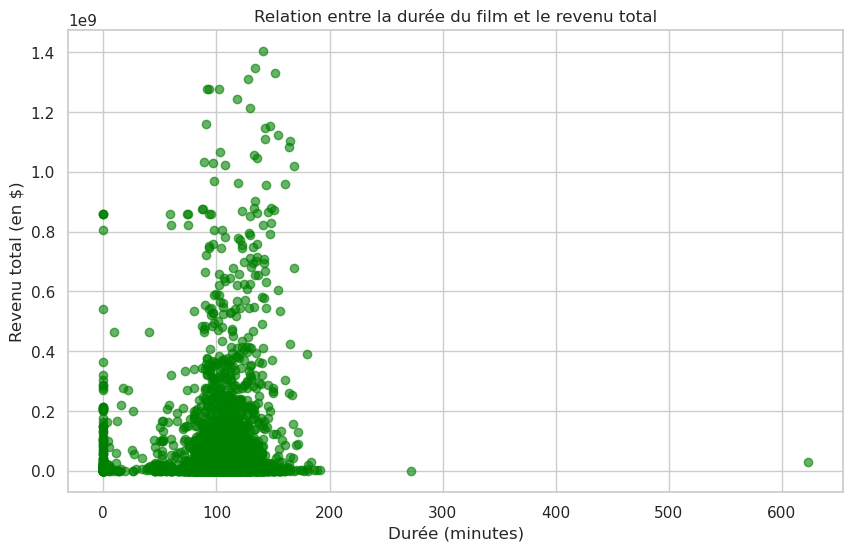

In [14]:

# Chargement de la table movie_basics
df_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Nettoyage des données de la base
df_basics['runtime_minutes'] = pd.to_numeric(df_basics['runtime_minutes'], errors='coerce').fillna(0)

# Fusion des données sur les titres
merged_df = pd.merge(df_clean, df_basics, left_on="title", right_on="primary_title", how="inner")

# Conversion des revenus pour créer total_gross
merged_df['domestic_gross'] = pd.to_numeric(merged_df['domestic_gross'], errors='coerce')
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')
merged_df['total_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']

# Vérification des colonnes fusionnées
print("Fusion réussie. Colonnes disponibles :", merged_df.columns.tolist())
print(merged_df[['title', 'runtime_minutes', 'total_gross']].head())

# Analyse : Durée vs Revenu
plt.figure(figsize=(10,6))
plt.scatter(merged_df['runtime_minutes'], merged_df['total_gross'], alpha=0.6, color='green')
plt.title("Relation entre la durée du film et le revenu total")
plt.xlabel("Durée (minutes)")
plt.ylabel("Revenu total (en $)")
plt.grid(True)
plt.show()

## XIII- Analyse des genres de films les plus votés
### Cette étape analyse la popularité des genres de films en fonction du nombre total de votes reçus, après avoir séparé les genres multiples et agréger les votes par catégorie.

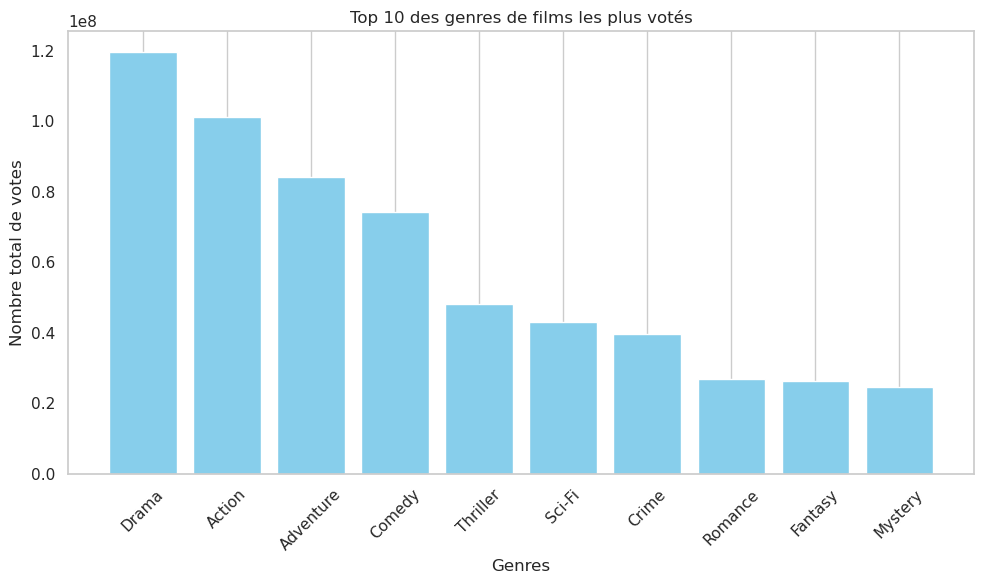

In [15]:
# Chargement des deux tables nécessaires
df_basics = pd.read_sql_query("SELECT movie_id, genres FROM movie_basics", conn)
df_ratings = pd.read_sql_query("SELECT movie_id, numvotes FROM movie_ratings", conn)

# Nettoyage des valeurs manquantes
df_basics['genres'] = df_basics['genres'].fillna("Unknown")
df_ratings['numvotes'] = pd.to_numeric(df_ratings['numvotes'], errors='coerce').fillna(0)

# Fusion des deux tables sur movie_id
merged_df = pd.merge(df_basics, df_ratings, on="movie_id", how="inner")

# Certains films ont plusieurs genres séparés par ',' on les a séparer
df_exploded = merged_df.copy()
df_exploded['genres'] = df_exploded['genres'].str.split(',')
df_exploded = df_exploded.explode('genres')

# Regroupement par genre et addition des votes
genre_votes = df_exploded.groupby('genres')['numvotes'].sum().sort_values(ascending=False).reset_index()

# Graphe
plt.figure(figsize=(10,6))
plt.bar(genre_votes['genres'][:10], genre_votes['numvotes'][:10], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 10 des genres de films les plus votés")
plt.xlabel("Genres")
plt.ylabel("Nombre total de votes")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

conn.close()